**120 yıllık olimpiyat veri seti inceleme** 

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


veri setini okuma 

In [154]:
df = pd.read_csv("athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


özet bilgisini alma

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


boş değer kontrolü

In [156]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

tabloya bakıldığında age height weight madal sütunlarında boş değer olduğunu görmekteyiz. Dolu değerlerin dağılım yüzdelerini konrol edelim.

In [157]:
df.Medal.value_counts(normalize=True)

Gold      0.336123
Bronze    0.334188
Silver    0.329689
Name: Medal, dtype: float64

In [158]:
df.Age.value_counts(normalize=True)

23.0    0.083607
24.0    0.083014
22.0    0.079551
25.0    0.075320
21.0    0.073245
          ...   
77.0    0.000008
84.0    0.000004
10.0    0.000004
96.0    0.000004
97.0    0.000004
Name: Age, Length: 74, dtype: float64

In [159]:
df.Height.value_counts(normalize=True)

180.0    0.059219
170.0    0.056773
178.0    0.050762
175.0    0.048923
183.0    0.039271
           ...   
226.0    0.000014
131.0    0.000009
130.0    0.000009
219.0    0.000009
128.0    0.000005
Name: Height, Length: 95, dtype: float64

In [160]:
df.Weight.value_counts(normalize=True)

70.0     0.046220
60.0     0.038388
75.0     0.037505
68.0     0.034979
65.0     0.034748
           ...   
190.0    0.000005
180.0    0.000005
149.0    0.000005
48.5     0.000005
198.0    0.000005
Name: Weight, Length: 220, dtype: float64

Geriye kalan doş değerleri dolduralım.

In [161]:
df['Medal'].fillna(value ="didn't_win_a_medal", inplace=True)

df['Age'].fillna(value = df['Age'].mean(), inplace=True)

df['Height'].fillna(value = df['Height'].mean(), inplace=True)

df['Weight'].fillna(value = df['Weight'].mean(), inplace=True)

df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Bütün boş değerleri doldurduk.Peki tekrar eden değer var mı , varsa kaldıralım.

In [162]:
df.duplicated().sum()

1385

In [92]:
df.drop_duplicates(inplace=True)

bütün tekrar eden değerler kaldırıldı

**Görselleştirme soruları**

Ülkelerin sporcu sayıları

Ülkelerin madalya sayıları

Sporcuların ülkelere göre cinsiyet dağılımı

Katılan sporcuların branşları

Sezonlara göre yapılan sporlar

Sporcuların yaş dağılımı

Madalyaların ülkelere göre dağılımı(altın,gümüş,bronz olarak)

**Ülkelerin sporcu sayıları**

In [163]:
athlete=df.Team.value_counts()
athlete

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

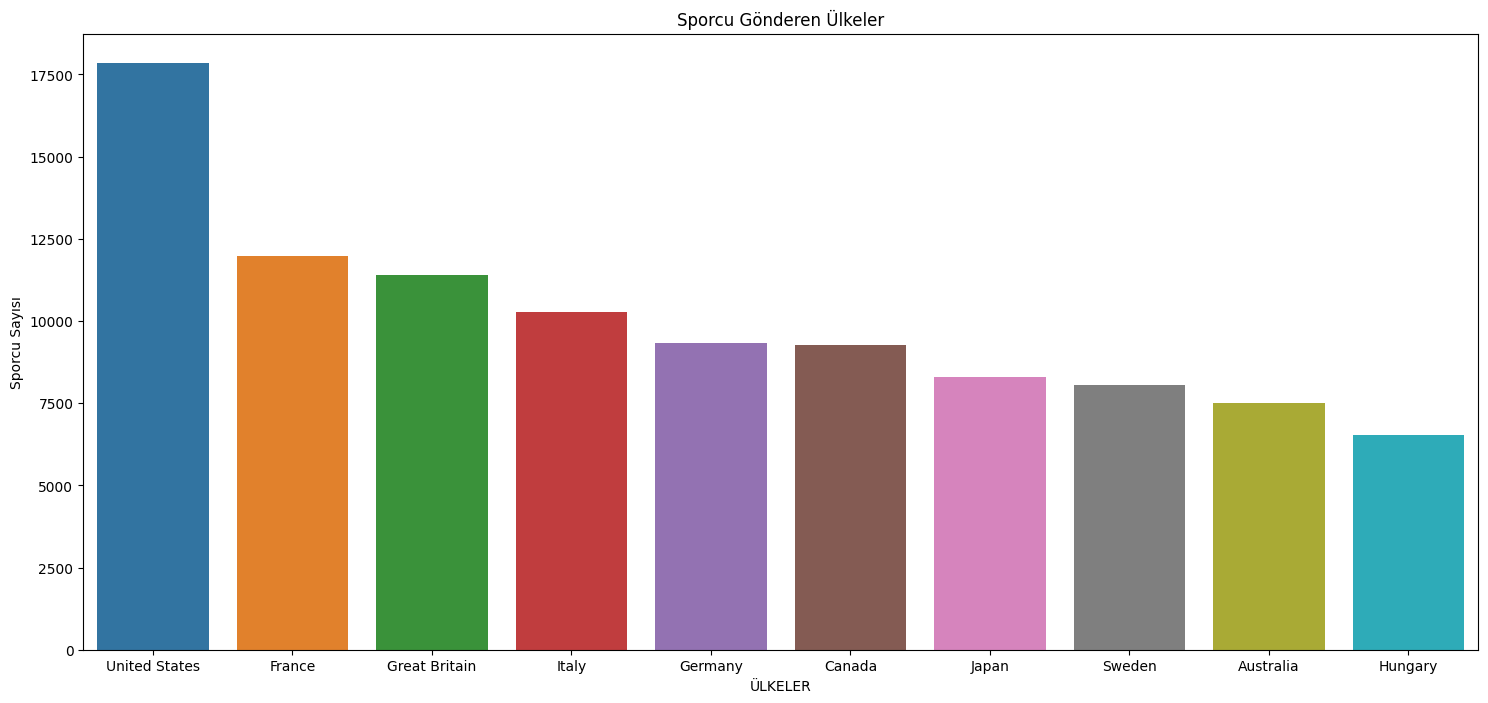

In [164]:
plt.figure(figsize=[18,8])
sns.barplot(x=athlete[:10].index, y=athlete[:10])
plt.title("Sporcu Gönderen Ülkeler")
plt.xlabel("ÜLKELER")
plt.ylabel("Sporcu Sayısı");

10 ülke almamızdaki sebep tablonun okunurluğunu arttırmak 

**Ülkelerin madalya sayıları**

In [165]:
medal = df[df.Medal != "didn't_win_a_medal"]
country = medal.groupby('Team')['Medal'].count().sort_values(ascending=False)
country

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
                 ... 
Femur-1             1
Formosa             1
Iraq                1
Senegal             1
Eritrea             1
Name: Medal, Length: 498, dtype: int64

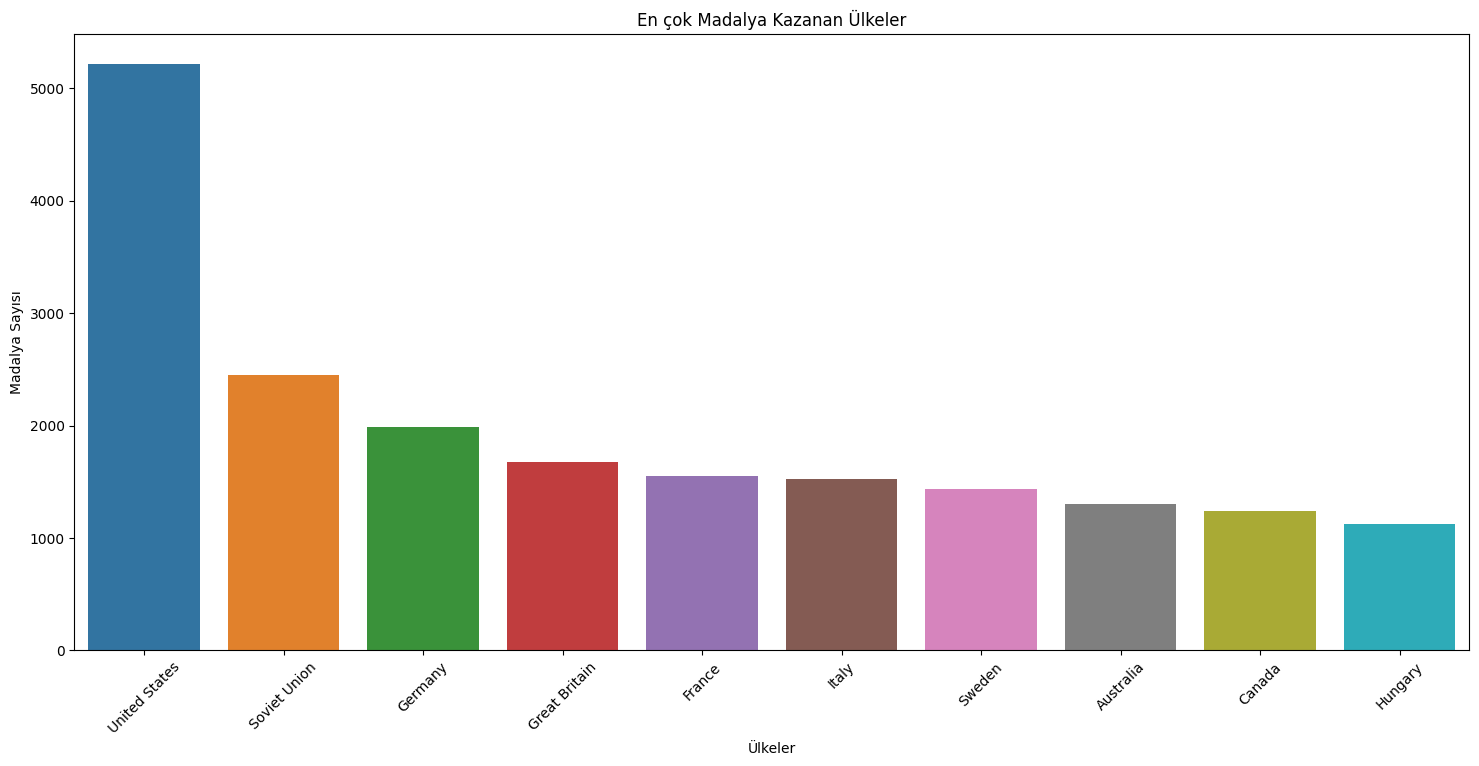

In [166]:
plt.figure(figsize=[18,8])
plt.xticks(rotation=45)
sns.barplot(x=country[:10].index, y=country[:10])
plt.ylabel("Madalya Sayısı")
plt.xlabel("Ülkeler")
plt.title("En çok Madalya Kazanan Ülkeler");

plt.xticks(rotation=45) ülkelerin adlarını 45 derecelik açı ile yazmamızı sağlar.

**Sporcuların ülkelere göre cinsiyet dağılımı**

erkek dağılımı

In [167]:
gender=df[df.Sex != 'F']
gender_by_country=gender.groupby('Team')['Sex'].count().sort_values(ascending=False)
gender_by_country

Team
United States       12479
France               9245
Great Britain        8216
Italy                7756
Germany              6415
                    ...  
Augsburg                1
Potsdam                 1
Nadine                  1
Briar                   1
Demi-Mondaine-17        1
Name: Sex, Length: 1154, dtype: int64

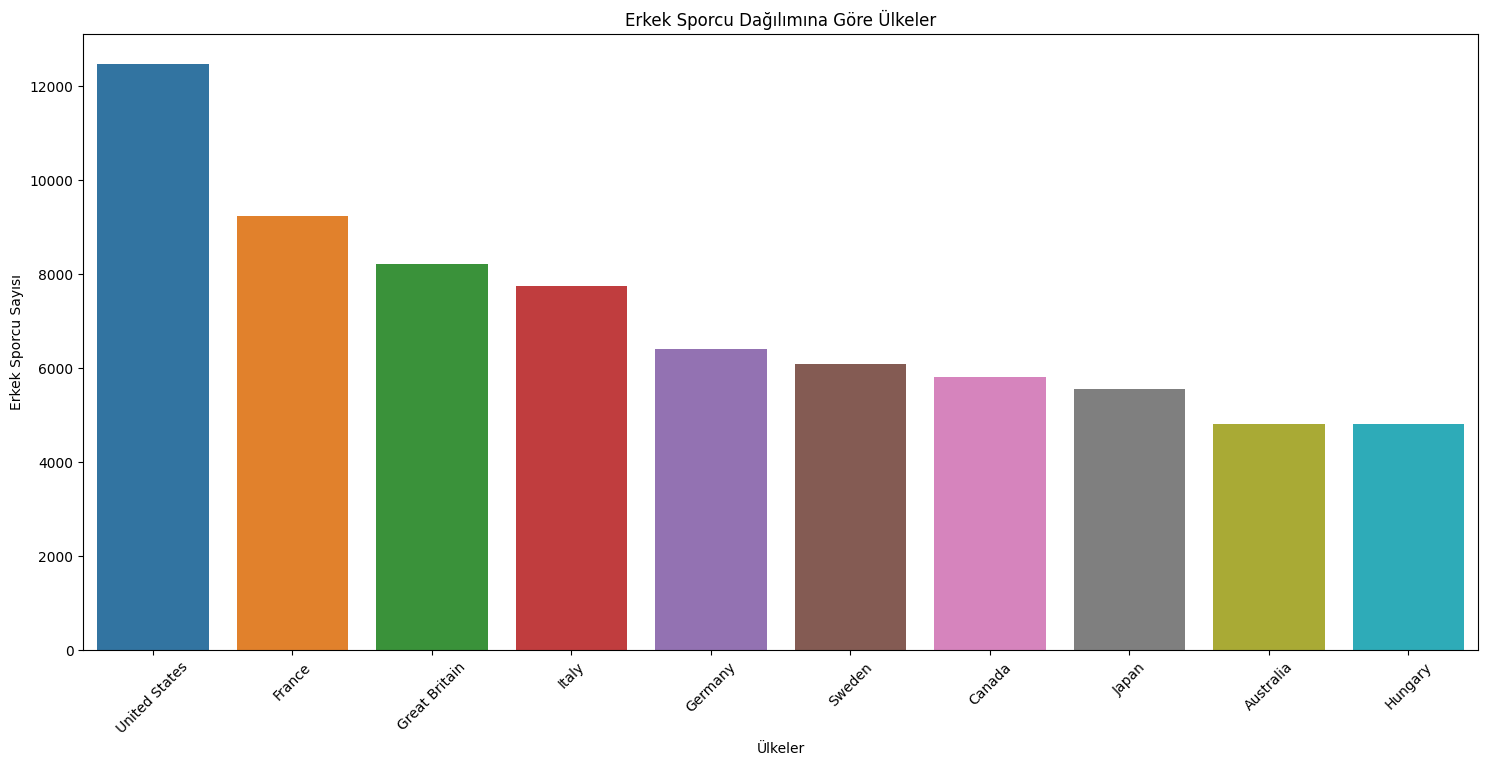

In [168]:
plt.figure(figsize=[18,8])
plt.xticks(rotation=45)
sns.barplot(x=gender_by_country[:10].index, y=gender_by_country[:10])
plt.ylabel("Erkek Sporcu Sayısı")
plt.xlabel("Ülkeler")
plt.title("Erkek Sporcu Dağılımına Göre Ülkeler");

kadın dağılımı

In [169]:
gender=df[df.Sex != 'M']
gender_by_country=gender.groupby('Team')['Sex'].count().sort_values(ascending=False)
gender_by_country

Team
United States    5368
Canada           3473
Great Britain    3188
Germany          2911
France           2743
                 ... 
Ireland-1           1
Solos Carex         1
Ireland-2           1
Skidoo              1
L'Aile VI           1
Name: Sex, Length: 374, dtype: int64

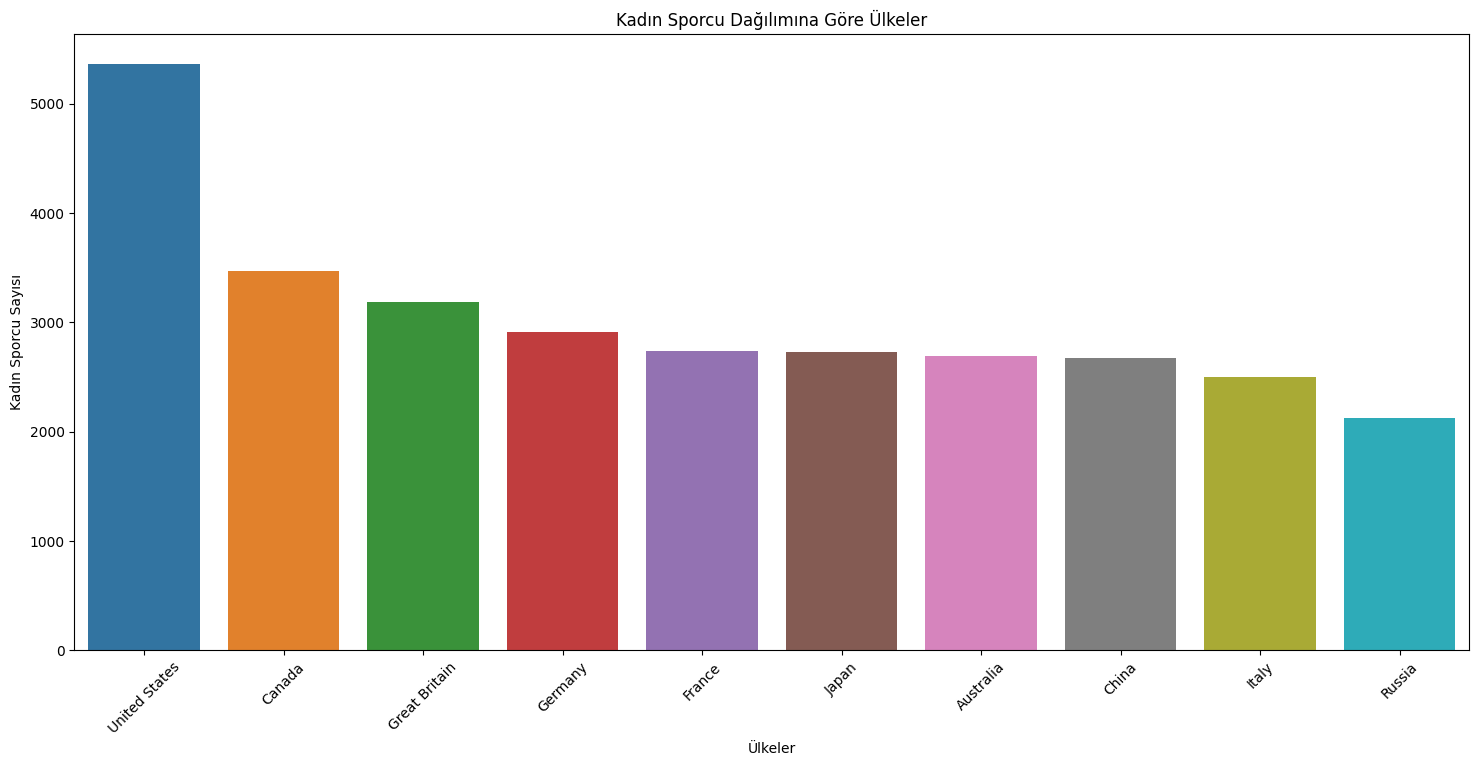

In [170]:
plt.figure(figsize=[18,8])
plt.xticks(rotation=45)
sns.barplot(x=gender_by_country[:10].index, y=gender_by_country[:10])
plt.ylabel("Kadın Sporcu Sayısı")
plt.xlabel("Ülkeler")
plt.title("Kadın Sporcu Dağılımına Göre Ülkeler");

**Katılan sporcuların branşları**

In [171]:
branch=df.Sport.value_counts()
branch

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

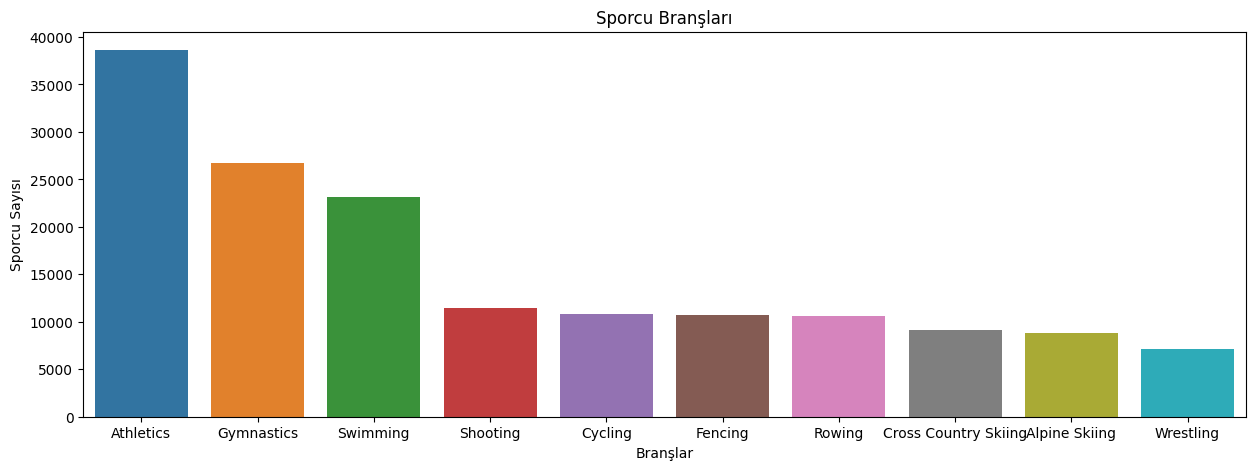

In [172]:
plt.figure(figsize=[15,5])
sns.barplot(x=branch[:10].index, y=branch[:10])
plt.title("Sporcu Branşları")
plt.xlabel("Branşlar")
plt.ylabel("Sporcu Sayısı");

**Sezonlara göre yapılan sporlar**

Kış sporları

In [173]:
season=df[df.Season != 'Summer']
season_by_sports=season.groupby('Sport')['Season'].count().sort_values(ascending=False)
season_by_sports

Sport
Cross Country Skiing         9133
Alpine Skiing                8829
Speed Skating                5613
Ice Hockey                   5456
Biathlon                     4893
Bobsleigh                    3058
Ski Jumping                  2401
Figure Skating               2244
Short Track Speed Skating    1534
Luge                         1479
Nordic Combined              1344
Freestyle Skiing              937
Snowboarding                  936
Curling                       463
Skeleton                      199
Military Ski Patrol            24
Alpinism                       21
Name: Season, dtype: int64

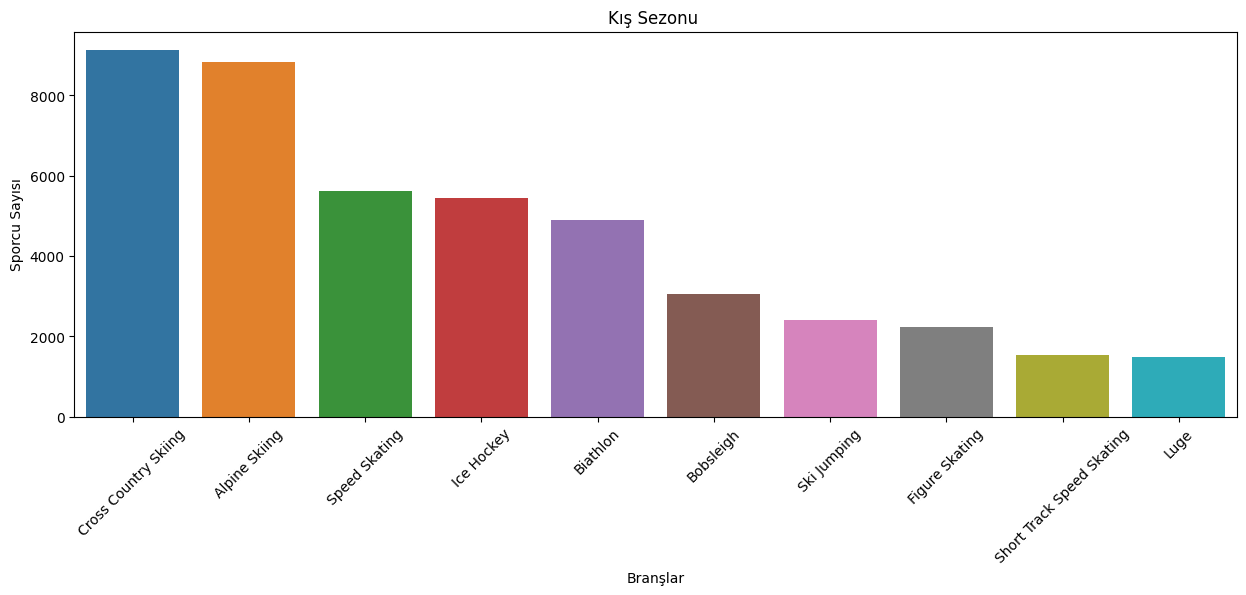

In [174]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=45)
sns.barplot(x=season_by_sports[:10].index, y=season_by_sports[:10])
plt.ylabel("Sporcu Sayısı")
plt.xlabel("Branşlar")
plt.title("Kış Sezonu ");

Yaz sporları

In [175]:
season=df[df.Season != 'Winter']
season_by_sports=season.groupby('Sport')['Season'].count().sort_values(ascending=False)
season_by_sports

Sport
Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Hockey                    5417
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Tennis                    2862
Diving                    2842
Archery                   2334
Table Tennis              1955
Modern Pentathlon         1677
Badminton                 1457
Synchronized Swimming      909
Baseball                   894
Rhythmic Gymnastics        658
Taekwondo                  606
Beach Volleyball           564
Tr

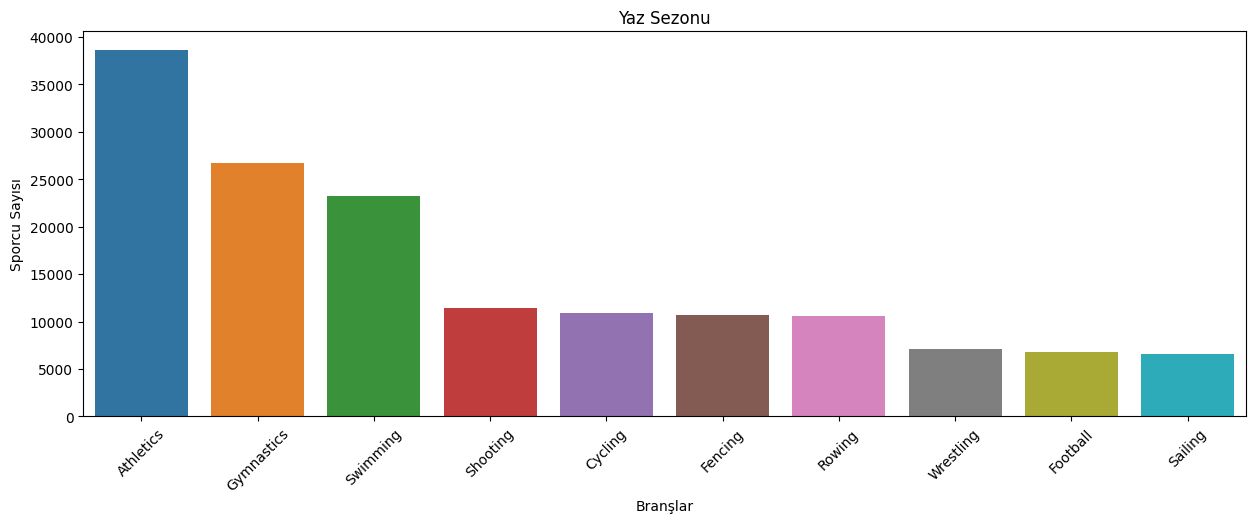

In [176]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=45)
sns.barplot(x=season_by_sports[:10].index, y=season_by_sports[:10])
plt.ylabel("Sporcu Sayısı")
plt.xlabel("Branşlar")
plt.title("Yaz Sezonu");

**Sporcuların yaş dağılımı**

In [177]:
ages=df.Age.value_counts()
ages

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
96.0        1
10.0        1
97.0        1
Name: Age, Length: 75, dtype: int64

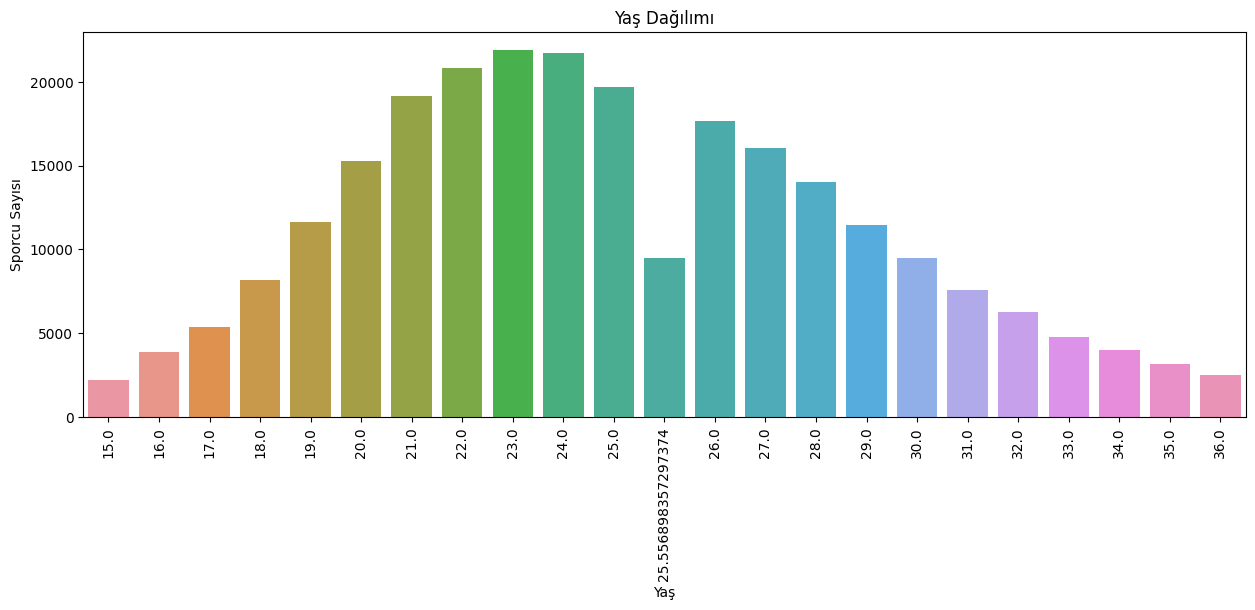

In [178]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(x=ages[:15].index, y=ages[:15])
plt.ylabel("Sporcu Sayısı")
plt.xlabel("Yaş")
plt.title("Yaş Dağılımı");

**Madalyaların ülkelere göre dağılımı(altın,gümüş,bronz olarak)**

Bronz madalya

In [179]:
br=df[df.Medal != ("didn't_win_a_medal" and "Silver" and "Gold")]
bron=br.groupby('Team')['Medal'].count().sort_values(ascending=False)
bron


Team
United States       15373
France              11533
Great Britain       10885
Italy                9725
Canada               8857
                    ...  
Turquoise-1             1
Fantlet-2               1
Fantlet-7               1
Femur-18                1
Greenoaks Dundee        1
Name: Medal, Length: 1098, dtype: int64

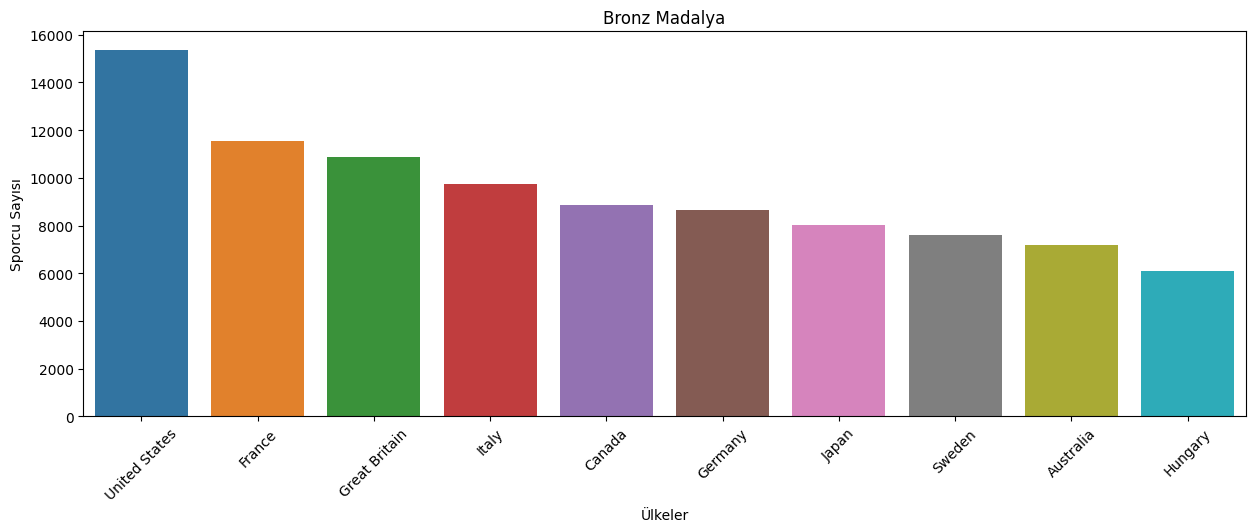

In [180]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=45)
sns.barplot(x=bron[:10].index, y=bron[:10])
plt.ylabel("Sporcu Sayısı")
plt.xlabel("Ülkeler")
plt.title("Bronz Madalya");

Altın madalya

In [181]:
gl=df[df.Medal != ("didn't_win_a_medal" and "Silver" and "Bronze")]
gold=gl.groupby('Team')['Medal'].count().sort_values(ascending=False)
gold

Team
United States     16614
France            11411
Great Britain     10832
Italy              9776
Canada             8871
                  ...  
Brandenburg           1
Pirouette-31          1
Suzon IV-39           1
Plume-patte-32        1
Danzig                1
Name: Medal, Length: 1108, dtype: int64

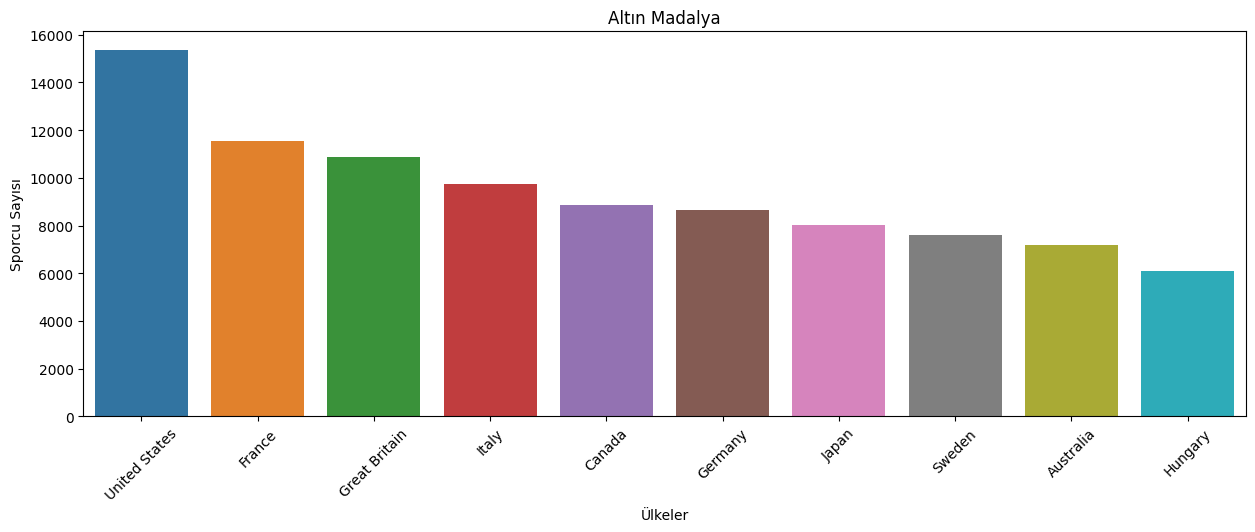

In [182]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=45)
sns.barplot(x=bron[:10].index, y=bron[:10])
plt.ylabel("Sporcu Sayısı")
plt.xlabel("Ülkeler")
plt.title("Altın Madalya");

Gümüş madalya

In [183]:
sl=df[df.Medal != ("didn't_win_a_medal" and "Silver" or "Bronze")]
silv=sl.groupby('Team')['Medal'].count().sort_values(ascending=False)
silv

Team
United States    16335
France           11470
Great Britain    10822
Italy             9752
Canada            8866
                 ...  
Tournade-40          1
Hamburg              1
Tornade-16           1
Rozenn-3             1
Turquoise-1          1
Name: Medal, Length: 1105, dtype: int64

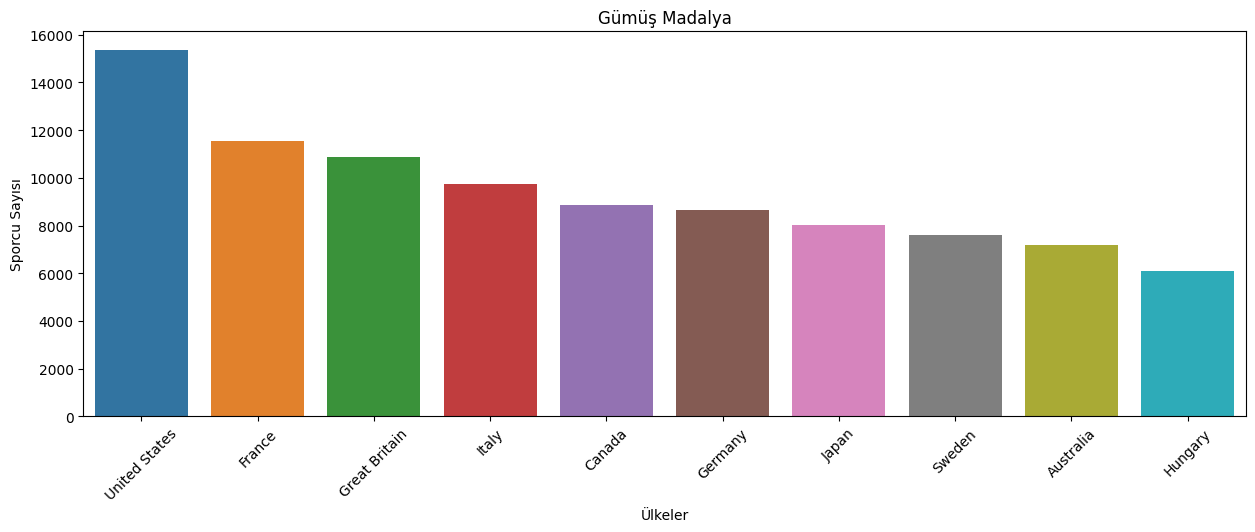

In [184]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=45)
sns.barplot(x=bron[:10].index, y=bron[:10])
plt.ylabel("Sporcu Sayısı")
plt.xlabel("Ülkeler")
plt.title("Gümüş Madalya");